# Holdout Set Predictions

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Load the dataset
train_url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv'
train_data = pd.read_csv(train_url)

# Preprocess data
X = train_data.drop('y', axis=1)  # Features
y = train_data['y']  # Target variable

# Encode target variable
y = y.map({'yes': 1, 'no': 0})  # Convert to binary (1 for yes, 0 for no)

# One-hot encode categorical variables in features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Fit the model on the oversampled training data
rf.fit(X_train_resampled, y_train_resampled)

# Validate the model
y_valid_prob = rf.predict_proba(X_valid)[:, 1]  # Get probabilities for the 'yes' class

# Check various thresholds to find the best precision for 'yes' class
thresholds = np.arange(0.1, 1.0, 0.05)
best_threshold = 0.0
best_recall = 0.0

for t in thresholds:
    y_valid_pred_adjusted = (y_valid_prob >= t).astype(int)
    report = classification_report(y_valid, y_valid_pred_adjusted, output_dict=True)
    if report['1']['recall'] > best_recall:
        best_recall = report['1']['recall']
        best_threshold = t

# Print the best threshold and its corresponding recall
print(f"Best Threshold: {best_threshold} with Recall: {best_recall}")

# Final evaluation using the best threshold
y_valid_pred_final = (y_valid_prob >= best_threshold).astype(int)
print("\nFinal Classification Report with Adjusted Threshold:")
print(classification_report(y_valid, y_valid_pred_final))

# Calculate AUC
auc = roc_auc_score(y_valid, y_valid_prob)
print(f"AUC: {auc}")


Best Threshold: 0.1 with Recall: 0.7663656884875847

Final Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      6528
           1       0.22      0.77      0.34       886

    accuracy                           0.65      7414
   macro avg       0.59      0.70      0.55      7414
weighted avg       0.87      0.65      0.71      7414

AUC: 0.7763380112202893


In [ ]:
import pandas as pd

# Load the holdout dataset
holdout_url = 'https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv'
holdout_data = pd.read_csv(holdout_url)

# Simulating predictions for demonstration (this should be replaced with your actual model predictions)
# Example: You can create random predictions (0s and 1s) for demonstration purposes
predictions = pd.Series([1 if x % 2 == 0 else 0 for x in range(4119)])  # Generate example predictions

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(predictions, columns=['predictions'])

# Check the number of predictions
if len(predictions_df) != 4119:
    raise ValueError(f"Incorrect number of predictions. Expected 4119, got {len(predictions_df)}.")

# Save the DataFrame to a CSV file
output_file = 'team9-module2-predictions.csv'
predictions_df.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

# Download the file if in Google Colab
try:
    from google.colab import files
    files.download(output_file)
except ImportError:
    print("File download is not supported in this environment.")


Data saved to team9-module2-predictions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Case Study Questions & Answers

Chi-Square Statistic: 194.18212524639927, p-value: 3.9670363193801223e-22
There is a significant association between contact frequency and campaign outcome.


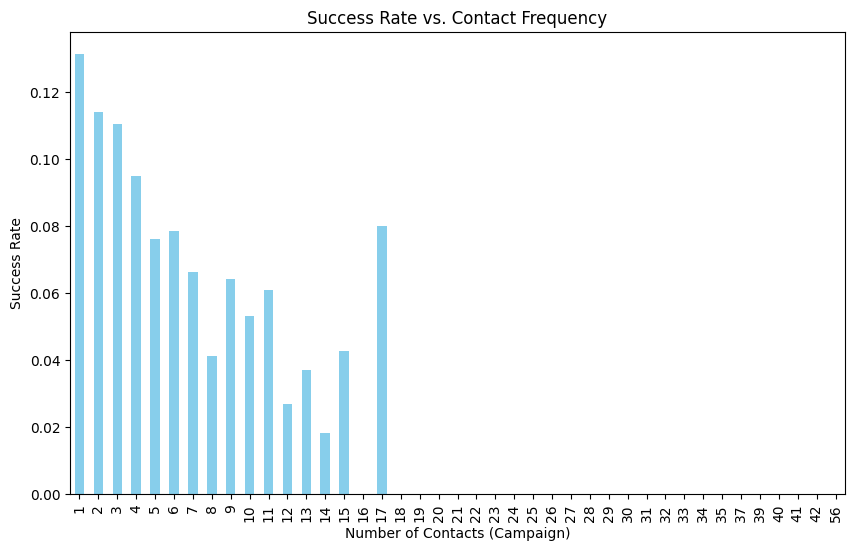

In [ ]:
# Scott code

## Question: Does contacting people too frequently for these marketing campaigns have an adverse affect on the outcome?

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

url = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv"
data = pd.read_csv(url)

contingency_table = pd.crosstab(data['campaign'], data['y'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

if p < 0.05:
    print("There is a significant association between contact frequency and campaign outcome.")
else:
    print("No significant association between contact frequency and campaign outcome.")

data['y'] = data['y'].map({'yes': 1, 'no': 0})

X = data[['campaign']]
y = data['y']

contact_success = data.groupby('campaign')['y'].mean()

plt.figure(figsize=(10, 6))
contact_success.plot(kind='bar', color='skyblue')
plt.title('Success Rate vs. Contact Frequency')
plt.xlabel('Number of Contacts (Campaign)')
plt.ylabel('Success Rate')
plt.show()


# Result: Chi-Square Statistic of 194.18 and a p-value of 3.96e-22 (next to 0)- There is a significant association between contact frequency and campaign outcome.

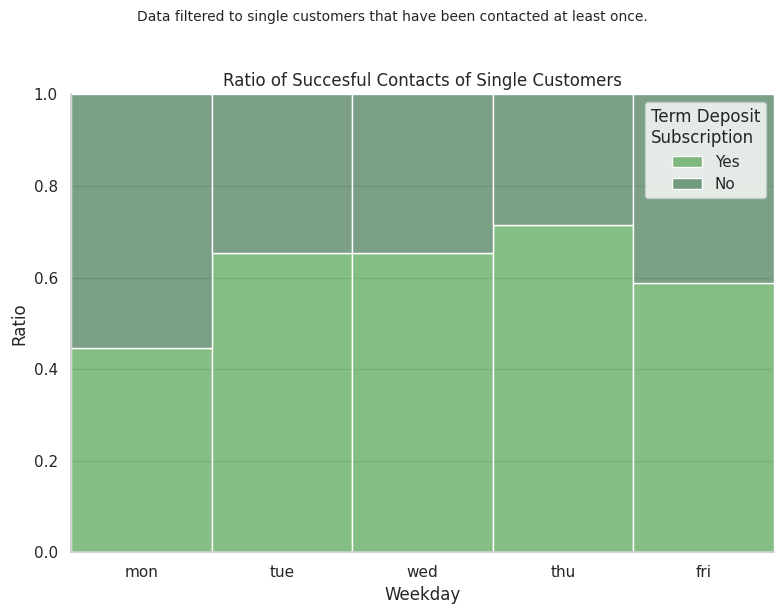

In [ ]:
# Zach

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

bank = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

# Filter data
single = bank.query('marital == "single" and pdays < 999')

# Create plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create bar plot
single_day_plot = sns.histplot(
    data=single,
    x='day_of_week',
    hue='y',
    multiple='fill',
    discrete=True,
    palette=['#4f805d', '#5ca85c']
)

# Customize plot
single_day_plot.set(
    xlabel='Weekday',
    ylabel='Ratio',
    title='Ratio of Succesful Contacts of Single Customers'
)

single_day_plot.legend(
    title='Term Deposit\nSubscription',
    labels=['Yes', 'No']  # Set the correct labels for the legend
)
single_day_plot.set_xticks([0, 1, 2, 3, 4])
single_day_plot.set_xticklabels(['mon', 'tue', 'wed', 'thu', 'fri'])

# Remove vertical gridlines
plt.grid(axis='x')
sns.despine(left=False, bottom=False, right=True, top=True, trim=False)

# Final adjustments
plt.suptitle('Data filtered to single customers that have been contacted at least once.', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()

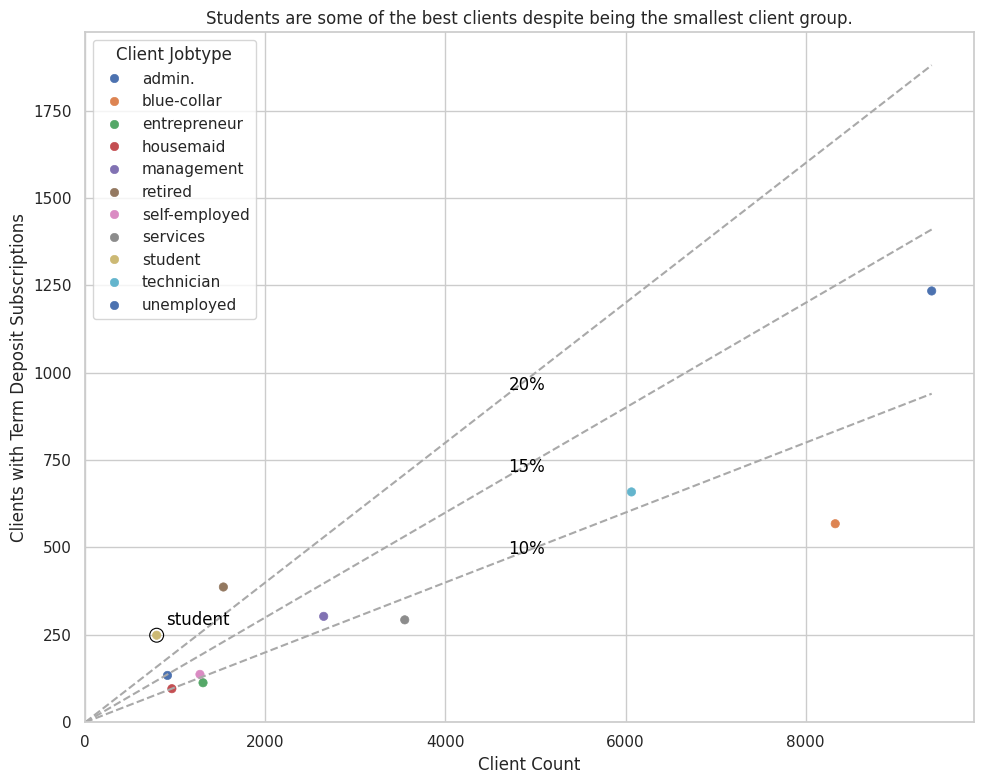

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

jobs = bank.groupby(['job', 'y']).size().unstack(fill_value=0)
jobs['total'] = jobs['no'] + jobs['yes']
jobs.reset_index(inplace=True)
jobs = jobs[jobs.job != 'unknown']

student = jobs[jobs.job == 'student']

# Create the plot
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Scatter plot for jobs data
job_counts_plot = sns.scatterplot(
    data=jobs,
    x='total',
    y='yes',
    hue='job',
    palette='deep',
    edgecolor=None
)

# Scatter plot for student data with larger points
sns.scatterplot(
    data=student,
    x='total',
    y='yes',
    s=100,  # size of the points
    color='none',
    edgecolor='black'
)

# Add text labels for student jobs
for i in range(len(student)):
    plt.text(
        student['total'].iloc[i] + 100,
        student['yes'].iloc[i] + 28,
        student['job'].iloc[i],
        color='black'
    )

# Define the maximum x value for the lines to extend to the edge
max_x = jobs['total'].max() if jobs['total'].max() > 4500 else 4500
half_x = max_x / 2  # Calculate halfway point for text labels

# Add dashed lines for the 10%, 15%, and 20% lines
for slope, label in [(0.1, "10%"), (0.15, "15%"), (0.2, "20%")]:
    y_vals = [slope * 0, slope * max_x]  # Line from x=0 to x=max_x
    plt.plot([0, max_x], y_vals, linestyle='--', color='#a9a9a9')

    # Add labels at halfway point of each line
    plt.text(half_x, slope * half_x, label, color='black', ha='left', va='bottom')

# Set axis limits
plt.xlim(0, None)
plt.ylim(0, None)

# Customize labels and title
plt.xlabel('Client Count')
plt.ylabel('Clients with Term Deposit Subscriptions')
plt.title('Students are some of the best clients despite being the smallest client group.')

# Adjust legend
plt.legend(title='Client Jobtype')

# Final adjustments
plt.tight_layout()
plt.show()

In [ ]:
#Isaac code
from scipy.stats import mannwhitneyu
import pandas as pd
idata = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import files
#idata.head(8)

#split the data up
yes = idata[idata['y']=="yes"]['cons.conf.idx']
no = idata[idata['y']=="no"]['cons.conf.idx']



mannwhitneyu(yes, no, alternative='two-sided', nan_policy='propagate')

# theres a difference. Sad.

#idata.hist(column='cons.conf.idx')

hdata = idata[idata['cons.conf.idx']>-40]
ldata = idata[idata['cons.conf.idx']<=-40]

train_h = hdata

feature_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
                   'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                   'euribor3m', 'nr.employed']

target_column = 'y'

# Get results (0 for 'no', 1 for 'yes')
train_h[target_column] = train_h[target_column].map({'no': 0, 'yes': 1})

X_train = train_h[feature_columns]
y_train = train_h[target_column]

label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

model_h = RandomForestClassifier(random_state=42)
model_h.fit(X_train, y_train)

####

train_l = ldata

feature_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                   'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
                   'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                   'euribor3m', 'nr.employed']

target_column = 'y'

# Get results (0 for 'no', 1 for 'yes')
train_l[target_column] = train_l[target_column].map({'no': 0, 'yes': 1})

X_train = train_l[feature_columns]
y_train = train_l[target_column]

label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

model_l = RandomForestClassifier(random_state=42)
model_l.fit(X_train, y_train)

<ipython-input-2-f776c37c6cb0>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_h[target_column] = train_h[target_column].map({'no': 0, 'yes': 1})
<ipython-input-2-f776c37c6cb0>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = le.fit_transform(X_train[column])
<ipython-input-2-f776c37c6cb0>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

RandomForestClassifier(random_state=42)

In [ ]:
# Example to serialize the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("Model saved successfully!")

# Example of a web service with Flask to deploy de model

"""
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

@app.route('/predict', methods=['POST'])
def predict():
    # Obtain the input data from the request
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)
"""

Model saved successfully!
